## Tutorial #4 - Product states

Entanglement is a quantum phenomenon that leads to unique statistical properties. We can harness it to do seemingly far-fetched tasks like quantum teleportation!

Given a multi-qubit pure state (i.e., does not need to be described by a density operator), the presence of entanglement boils down to whether or not the state is a product state. Given a two-qubit state where the qubits are labelled by  and , a general pure quantum state can be written as
$$\Ket{\psi}_{AB} = \sum_{i,j}\Ket{i}_A \otimes \Ket{j}_B$$
$\Ket{\psi}_{AB}$ is said to be a product state for subsystems $A$ and $B$ if it can be written as a tensor product
$$\Ket{\psi}_{AB} =\Ket{\psi}_A \otimes \Ket{\psi}_B$$
For example, the well-known Bell states cannot be written as product states between the two qubits.

Your job is to create a function that can tell whether or not a pure state can be written as a product state between a subsystem and its complement (e.g., if $A$ is the subsystem, then $B=\tilde{A}$, meaning that system $B$ is the set of qubits that are not in $A$).

**Challenge code**
In the code below, you are given a function called is_product. This function will output "yes" or "no" correspondingly. You must complete this function.
Here are some helpful resources:

* [Separable quantum states](https://en.wikipedia.org/wiki/Separable_state)
* [qml.density_matrix](https://docs.pennylane.ai/en/stable/code/api/pennylane.density_matrix.html)

**Input**
As input to this problem, you are given:

* state (list(float)): this defines  (pure quantum state in question).
* subsystem (list(int)): the subsystem that defines the subsystem of qubits  and . I.e., the two groups of qubits that you will determine if a state can be written as a product state.
* wires (list(int)): the wire labels associated to the qubit state of interest.


In [29]:
import json
import pennylane as qml
import numpy as np

Example

(<Figure size 400x300 with 1 Axes>, <Axes: >)


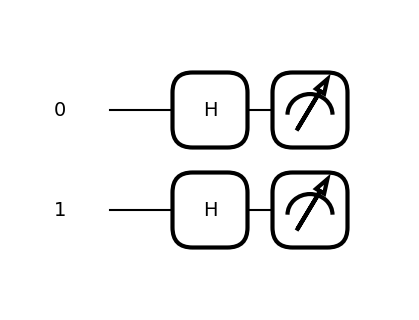

In [13]:
dev = qml.device('default.qubit',wires=2)
@qml.qnode(dev)
def qn_separable():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state() # we can also use qml.purity(wires= [0,1]) and qml.vn_entropy()

print(qml.draw_mpl(qn_separable)())

In [20]:
qn_separable()

tensor([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j], requires_grad=True)

In [18]:
x = [[1/2, 0, 0, 1/2], [0, 0, 0, 0], [0, 0, 0, 0], [1/2, 0, 0, 1/2]]
qml.math.purity(x, [0, 1])
qml.math.purity(x, [0])

0.5

In [25]:
state = qn_separable()
x = qml.math.dm_from_state_vector(state)
gamma = qml.math.purity(x,[0,1])
gamma

0.9999999999999991

In [23]:
state = qn_separable()
x = qml.math.dm_from_state_vector(state)
S = qml.math.vn_entropy(x,indices=[0],base=2)
S

6.406853007629834e-16

In [28]:
dev = qml.device('default.qubit',wires=2)
@qml.qnode(dev)
def qn_entangled():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.purity(wires= [0])

qn_entangled()

tensor(0.5, requires_grad=True)

IS not equal 1

PennyLane contains a template called [MottonenStatePreparation](https://docs.pennylane.ai/en/stable/code/api/pennylane.MottonenStatePreparation.html), which will automatically prepare any normalized qubit state vector, up to a global phase. You need only pass the template a normalized state vector, and a set of wires. This is especially convenient for multi-qubit systems, where it would be challenging to find state preparation circuits by hand.

In [30]:
def is_product(state, subsystem, wires):
    """Determines if a pure quantum state can be written as a product state between
    a subsystem of wires and their compliment.

    Args:
        state (numpy.array): The quantum state of interest.
        subsystem (list(int)): The subsystem used to determine if the state is a product state.
        wires (list(int)): The wire/qubit labels for the state. Use these for creating a QNode if you wish!

    Returns:
        (str): "yes" if the state is a product state or "no" if it isn't.
    """
    dev = qml.device('default.qubit', wires = wires)
    @qml.qnode(dev)
    def circuit(state, wires,subsystem):
        qml.MottonenStatePreparation(state, wires = wires)
        return qml.vn_entropy(wires = subsystem)
    if circuit(state, wires, subsystem) == 0:
        return 'yes'
    else:
        return 'no'

In [31]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    state, subsystem, wires = ins
    state = np.array(state)
    output = is_product(state, subsystem, wires)
    return output

def check(solution_output: str, expected_output: str) -> None:
    assert solution_output == expected_output

In [32]:
test_cases = [['[[0.707107, 0, 0, 0.707107], [0], [0, 1]]', 'no'], ['[[1, 0, 0, 0], [0], [0, 1]]', 'yes']]

In [33]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[0.707107, 0, 0, 0.707107], [0], [0, 1]]'...
Correct!
Running test case 1 with input '[[1, 0, 0, 0], [0], [0, 1]]'...
Correct!
